# Центральная предельная теорема

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

## Экспоненциальное распределение 
<a href="https://ru.wikipedia.org/wiki/Экспоненциальное_распределение">Ссылка на википедию</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

__Генерация выборки из экспоненциального распределения размером 1000 с параметром scale=80__

In [10]:
scale = 80
x = np.linspace(0, 600, 1000)
sample = np.random.exponential(scale=scale, size=1000, )
pdf = sts.expon.pdf(x, scale=scale)

__Построение гистограммы выборки и графика теоретической плотности распределения__

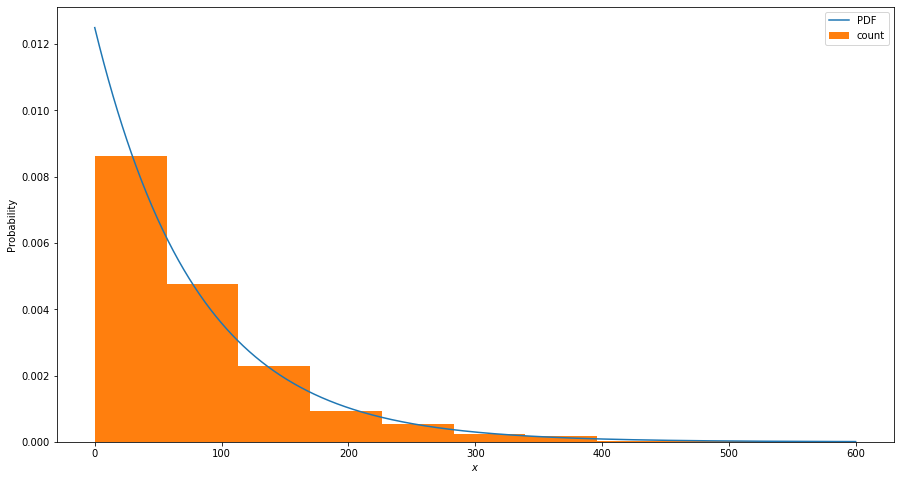

In [11]:
plt.figure(figsize=(15, 8))
plt.plot(x, sts.expon.pdf(x, scale=scale), label='PDF')
plt.hist(sample, density=True, label='count')
plt.xlabel('$x$')
plt.ylabel('Probability')
plt.legend()
plt.show()

График теоретической плотности вероятности хорошо описывает полученную гистограмму (что мы и ожидали увидеть)

__Оценка распределения выборочного среднего экспоненциальной случайной величины при разных объёмах выборок (5, 10, 50)__

Создание массивов выборочных средних

In [12]:
sample_size = (5, 10, 50)
sm = ([], [], [])
idx = 0
for n in sample_size:
    for _ in range(1000):
        sample = np.random.exponential(scale=scale, size=n)
        sm[idx].append(sample.mean())
    idx += 1

Для экспоненциального распределения __матожидание__ = $\frac{1}{\lambda}$, а __дисперсия__ = $\frac{1}{\lambda^{2}}$ <br>
Параметр __scale__ = $\frac{1}{\lambda}$

In [13]:
mean = scale
variance = (1 / scale) ** (-2)

### Визуализация

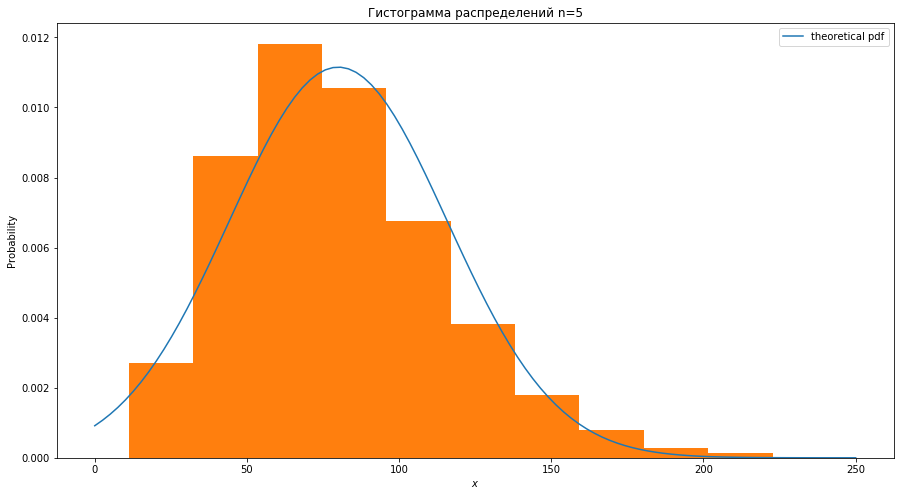

In [14]:
x = np.linspace(0, 250, 100)
plt.figure(figsize=(15, 8))
plt.plot(x, sts.norm.pdf(x, mean, math.sqrt(variance/5)), label='theoretical pdf')
plt.title("Гистограмма распределений n=5")
plt.xlabel('$x$')
plt.ylabel('Probability')
plt.legend()
plt.hist(sm[0], density=True);

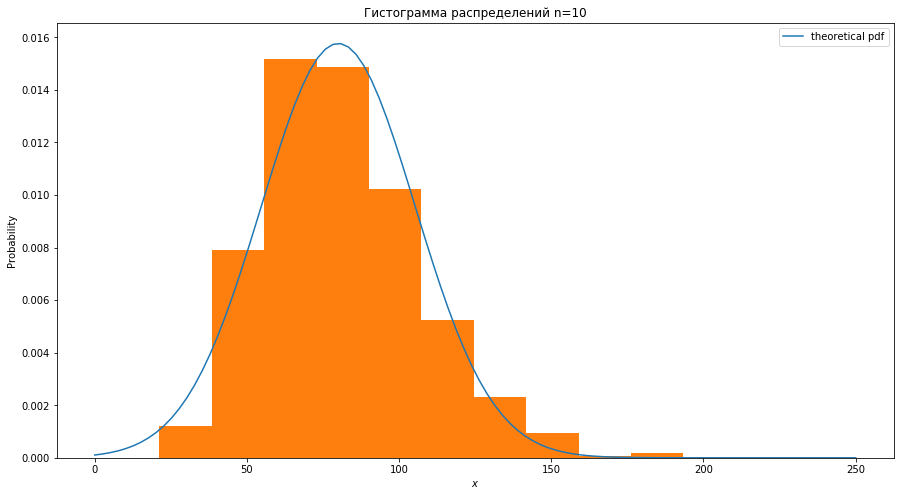

In [15]:
plt.figure(figsize=(15, 8))
plt.plot(x, sts.norm.pdf(x, mean, math.sqrt(variance/10)), label='theoretical pdf')
plt.title("Гистограмма распределений n=10")
plt.xlabel('$x$')
plt.ylabel('Probability')
plt.legend()
plt.hist(sm[1], density=True);

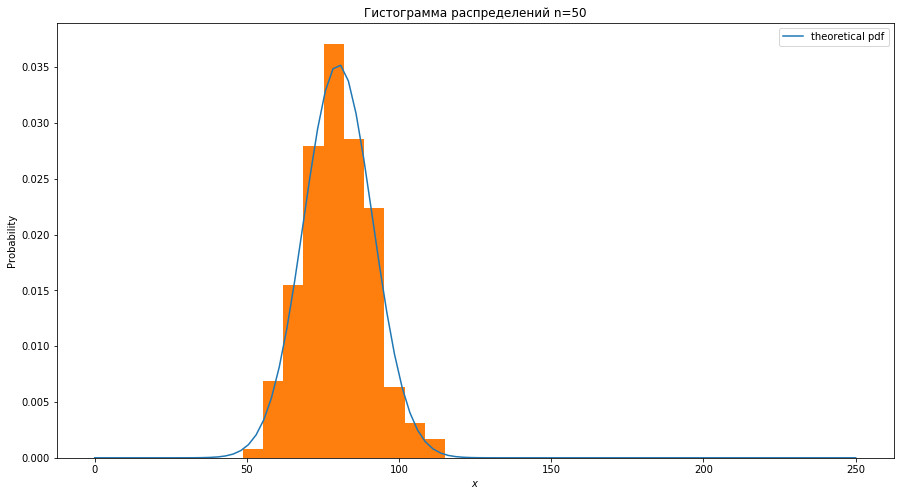

In [16]:
plt.figure(figsize=(15, 8))
plt.plot(x, sts.norm.pdf(x, mean, math.sqrt(variance/50)), label='theoretical pdf')
plt.title("Гистограмма распределений n=50")
plt.xlabel('$x$')
plt.ylabel('Probability')
plt.legend()
plt.hist(sm[2], density=True);

__Вывод:__ Центральная предельная теорема выполняется для экспоненциального распределения. Также с ростом n точность аппроксимации увеличилась, а дисперсия понизилась. 